<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Exploring-Tick,-Volume,-DV-Bars" data-toc-modified-id="Chapter-1---Exploring-Tick,-Volume,-DV-Bars-1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1 - Exploring Tick, Volume, DV Bars</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Read-and-Clean-Data" data-toc-modified-id="Read-and-Clean-Data-1.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read and Clean Data</a></span></li><li><span><a href="#Remove-Obvious-Price-Errors-in-Tick-Data" data-toc-modified-id="Remove-Obvious-Price-Errors-in-Tick-Data-1.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remove Obvious Price Errors in Tick Data</a></span></li></ul></li><li><span><a href="#Tick-Bars" data-toc-modified-id="Tick-Bars-2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tick Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars" data-toc-modified-id="Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars-2.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bonus Exercise: Make OHLC Bars from Custom Bars</a></span></li></ul></li></ul></li><li><span><a href="#Volume-Bars" data-toc-modified-id="Volume-Bars-3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume Bars</a></span></li><li><span><a href="#Dollar-Value-Bars" data-toc-modified-id="Dollar-Value-Bars-4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dollar Value Bars</a></span></li><li><span><a href="#Analyzing-the-Bars" data-toc-modified-id="Analyzing-the-Bars-5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Bars</a></span><ul class="toc-item"><li><span><a href="#Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)" data-toc-modified-id="Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)-5.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Count Quantity of Bars By Each Bar Type (Weekly)</a></span></li><li><span><a href="#Which-Bar-Type-Has-Most-Stable-Counts?" data-toc-modified-id="Which-Bar-Type-Has-Most-Stable-Counts?-5.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Bar Type Has Most Stable Counts?</a></span></li><li><span><a href="#Which-Bar-Type-Has-the-Lowest-Serial-Correlation?" data-toc-modified-id="Which-Bar-Type-Has-the-Lowest-Serial-Correlation?-5.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Which Bar Type Has the Lowest Serial Correlation?</a></span></li><li><span><a href="#Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance" data-toc-modified-id="Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance-5.4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance</a></span></li><li><span><a href="#Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?" data-toc-modified-id="Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?-5.5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Compute Jarque-Bera Test, Which Has Lowest Test Statistic?</a></span></li><li><span><a href="#Compute-Shapiro-Wilk-Test" data-toc-modified-id="Compute-Shapiro-Wilk-Test-5.6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Compute Shapiro-Wilk Test</a></span></li></ul></li><li><span><a href="#Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars" data-toc-modified-id="Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars-6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Serial Correlation between Dollar and Dollar Imbalance Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Update-[05.04.18]" data-toc-modified-id="Update-[05.04.18]-6.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Update [05.04.18]</a></span></li></ul></li></ul></li></ul></div>

Advances in Machine Learning

# Chapter 1 - Exploring Tick, Volume, DV Bars

In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2
# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
import pymc3 as pm
from theano import shared, theano as tt

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

from src.utils.utils import *
from src.features.bars import get_imbalance
import src.features.bars as brs
import src.features.snippets as snp

RANDOM_STATE = 777

print()
%watermark -p pandas,pandas_datareader,dask,numpy,pymc3,theano,sklearn,statsmodels,scipy,matplotlib,seaborn,pyarrow,fastparquet

2018-05-04T18:36:02-06:00

CPython 3.6.4
IPython 6.2.1

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.13.0-39-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit


/media/bcr/HDD/anaconda3/envs/bayes_dash/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/media/bcr/HDD/anaconda3/envs/bayes_dash/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



pandas 0.22.0
pandas_datareader 0.6.0
dask 0.17.0
numpy 1.14.0
pymc3 3.3
theano 1.0.1
sklearn 0.19.1
statsmodels 0.8.0
scipy 1.0.0
matplotlib 2.1.2
seaborn 0.8.1
pyarrow 0.8.0
fastparquet 0.1.5


## Introduction

This notebook explores the idea of sampling prices as a function of something other than fixed time intervals. For example using the number of ticks, volume or dollar volume traded as the sampling interval. The rest of this notebook works through some of the exercises found in chapters 1 and 2 of the book. 

This notebook makes use of the following script found here: `./src/features/bars.py`

## Read and Clean Data

The data set used in this example is too large to be hosted on github. It is a sample of equity tick data, symbol `IVE`, provided by [kibot.com (caution: download link)](http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest). Download this data to the `./data/raw/` directory in your local repo.

In [2]:
def read_kibot_ticks(fp):
    # read tick data from http://www.kibot.com/support.aspx#data_format
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    return df
    
infp = PurePath(data_dir/'raw'/'IVE_tickbidask.txt')

df = read_kibot_ticks(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293589 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293589 non-null float64
bid      1293589 non-null float64
ask      1293589 non-null float64
size     1293589

Save initial processed data as parquet in the `./data/interim/` folder and reload.

In [3]:
outfp = PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df.to_parquet(outfp)

In [4]:
infp=PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293589 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293589 non-null float64
bid      1293589 non-null float64
ask      1293589 non-null float64
size     1293589

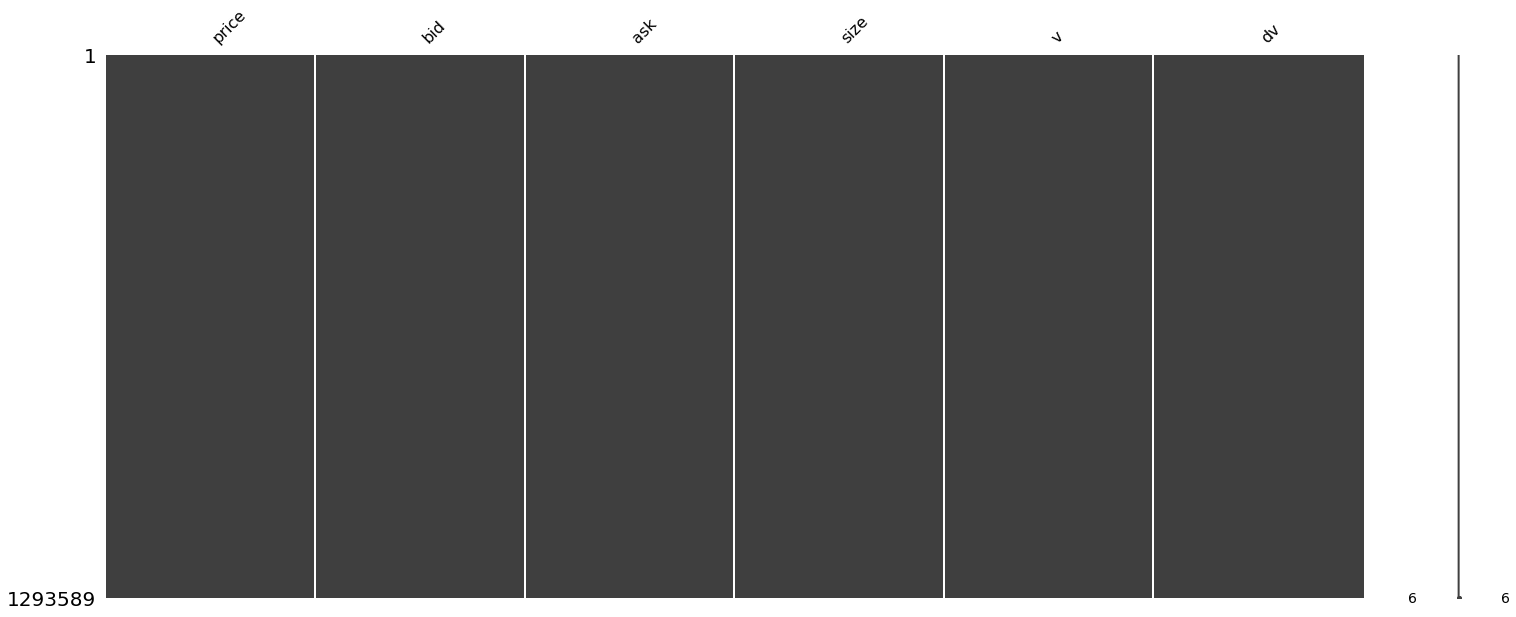

In [5]:
msno.matrix(df)

## Remove Obvious Price Errors in Tick Data

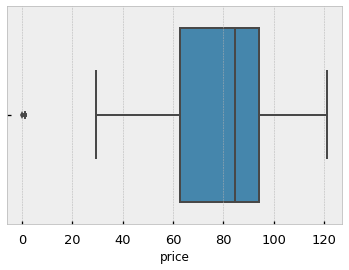

In [6]:
sns.boxplot(df.price)

In [7]:
@jit(nopython=True)
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [8]:
mad = mad_outlier(df.price.values.reshape(-1,1))

In [9]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


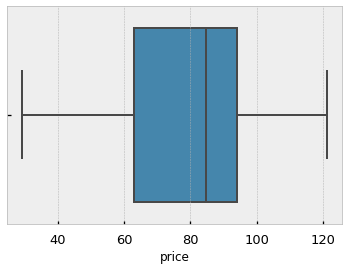

In [10]:
sns.boxplot(df.loc[~mad].price)

Drop outliers from dataset and save cleaned data in the `./data/processed/` folder.

In [11]:
df = df.loc[~mad]
cprint(df)

outfp = PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df.to_parquet(outfp)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293578 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293578 non-null float64
bid      1293578 non-null float64
ask      1293578 non-null float64
size     1293578

In [12]:
infp=PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293578 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293578 non-null float64
bid      1293578 non-null float64
ask      1293578 non-null float64
size     1293578

# Tick Bars

In [13]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

There are many ways to choose `M`, or the threshold value for sampling prices. One way is based on ratios of total dollar value/volume traded vs number of ticks. The rest of the notebook uses an arbitrary but sensible `M` value. I leave it as an exercise for the reader to see how the results change based on different values of `M`.

In [14]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,293,578
volume ratio: 536.0
dollar ratio: 43767.0


In [15]:
tick_M = 100 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

 16%|█▌        | 201521/1293578 [00:00<00:00, 2014779.60it/s]

tick threshold: 100


100%|██████████| 1293578/1293578 [00:00<00:00, 2701348.96it/s]


[99, 199, 299, 399, 499, 599, 699, 799, 899, 999]

In [16]:
df.iloc[tidx].shape, df.shape

((12935, 6), (1293578, 6))

Dataset is large so select smaller example for quick exploration

In [17]:
tick_df = tick_bar_df(df, 'price', tick_M)
tick_df.shape

100%|██████████| 1293578/1293578 [00:00<00:00, 2596507.45it/s]


(12935, 6)

In [18]:
def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

## try different dates to see how the quantity of tick bars changes
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (15,))

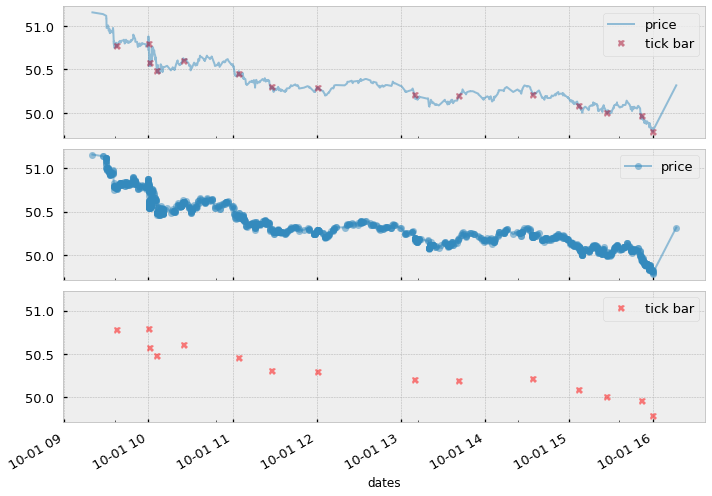

In [19]:
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,axes=plt.subplots(3,sharex=True, sharey=True, figsize=(10,7))
    ref.plot(*args, **kwds, ax=axes[0], label='price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend();
    
    ref.plot(*args, **kwds, ax=axes[1], label='price', marker='o')
    sub.plot(*args, **kwds, ax=axes[2], ls='', marker='X',
             color='r', label=bar_type)

    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    
    return

plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)

### Bonus Exercise: Make OHLC Bars from Custom Bars

Extract `tick_df.price` and `df.price` into two pandas series.

In [20]:
sub = tick_df.price
ref = df.price

The function below creates the OHLC dataframe by:
    1. Iterating over the subordinated series' index extracting idx and idx+1 period
    2. Selecting the same date period from the reference series
    3. Extracting the max, min prices from the reference series.
    4. Combining the o,h,l,c and start and end timestamps into a row
    5. Returning the aggregated rows as a pandas dataframe.

In [21]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['end','start','open','high','low','close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
#tick_bars_ohlc = get_ohlc(ref, sub)
#cprint(tick_bars_ohlc)

#outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
#tick_bars_ohlc.to_parquet(outfp)

# Volume Bars

In [22]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [23]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'v', 'price', volume_M)
cprint(v_bar_df)

 10%|█         | 134661/1293578 [00:00<00:00, 1346315.98it/s]

volume threshold: 10,000


100%|██████████| 1293578/1293578 [00:00<00:00, 2407460.21it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v           dv
dates                                                                   
2018-02-26 15:49:42  115.20  115.17  115.18     800     800     92160.00
2018-02-26 15:49:42  115.25  115.17  115.18   23923   23923   2757125.75
2018-02-26 15:58:15  115.24  115.24  115.25    3900    3900    449436.00
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.70
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.10
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54903 entries, 2009-09-28 09:44:09 to 2018-02-26 16:16:14
Data columns (total 6 columns):
price    54903 non-null float64
bid      54903 non-null float64
ask      54903 non-null float64
size     54903 no

xdf shape: (1466,), xtdf shape: (48,)


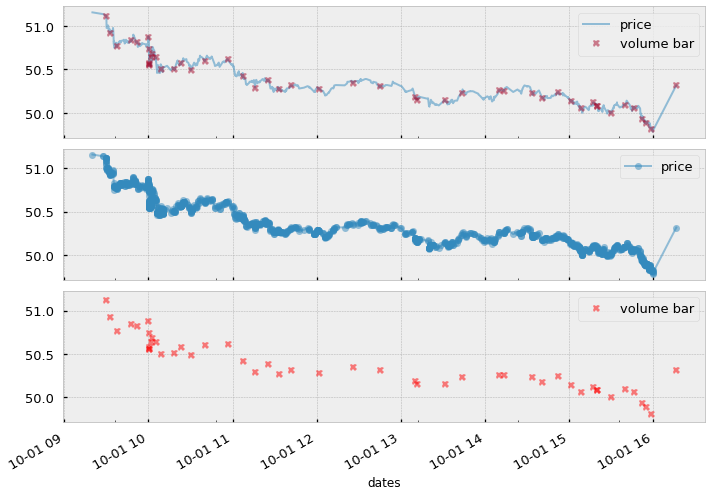

In [24]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7)  

# Dollar Value Bars

In [25]:
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [26]:
dollar_M = 1_000_000 # arbitrary 
print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(df, 'dv', 'price', dollar_M)
cprint(dv_bar_df)

 14%|█▎        | 176990/1293578 [00:00<00:00, 1769593.70it/s]

dollar threshold: 1,000,000


100%|██████████| 1293578/1293578 [00:00<00:00, 2426948.50it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask    size       v            dv
dates                                                                      
2018-02-26 15:42:24  115.3199  115.31  115.32     290     290  3.344277e+04
2018-02-26 15:49:42  115.2500  115.17  115.18   23923   23923  2.757126e+06
2018-02-26 15:58:15  115.2400  115.24  115.25    3900    3900  4.494360e+05
2018-02-26 16:00:00  115.3500  115.34  115.35    5362    5362  6.185067e+05
2018-02-26 16:16:14  115.3000  114.72  115.62  778677  778677  8.978146e+07
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44812 entries, 2009-09-28 09:46:35 to 2018-02-26 16:16:14
Data columns (total 6 columns):
price    44812 non-null float64
bid      44812 non-null float64
ask      44812 non-null floa

xdf shape: (1466,), xtdf shape: (26,)


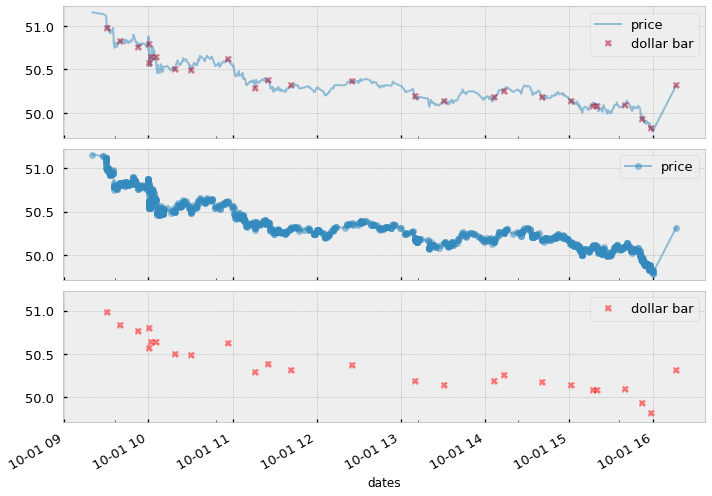

In [27]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

# Analyzing the Bars

## Count Quantity of Bars By Each Bar Type (Weekly)

In [28]:
def count_bars(df, price_col='price'):
    return df.groupby(pd.TimeGrouper('1W'))[price_col].count()

def scale(s):
    return (s-s.min())/(s.max()-s.min())

In [29]:
# count series
# scale to compare 'apples to apples'
tc = scale(count_bars(tick_df))
vc = scale(count_bars(v_bar_df))
dc = scale(count_bars(dv_bar_df))
dfc = scale(count_bars(df))

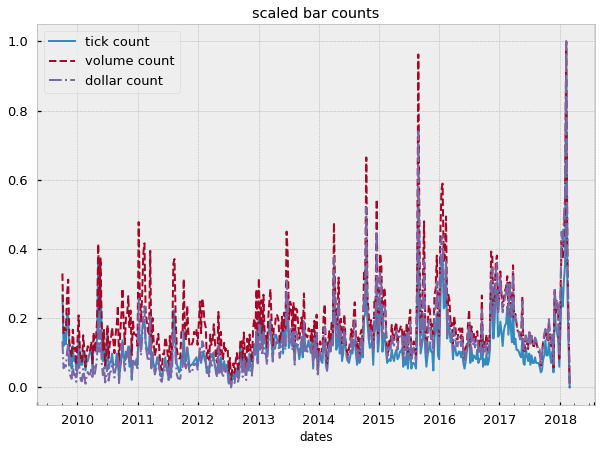

In [87]:
# plot time series of count

f,ax=plt.subplots(figsize=(10,7))

tc.plot(ax=ax, ls='-', label='tick count')
vc.plot(ax=ax, ls='--', label='volume count')
dc.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('scaled bar counts')
ax.legend()

## Which Bar Type Has Most Stable Counts?

In [116]:
print(f'tc std: {tc.std():.2%}, vc std: {vc.std():.2%}, dc std: {dc.std():.2%}')

bar_types = ['tick','volume','dollar','df']
bar_std = [tc.std(),vc.std(),dc.std(),dfc.std()]
counts = (pd.Series(bar_std,index=bar_types))
counts.sort_values()

tc std: 7.84%, vc std: 10.99%, dc std: 10.16%


df        0.078265
tick      0.078445
dollar    0.101649
volume    0.109923
dtype: float64

## Which Bar Type Has the Lowest Serial Correlation?

In [89]:
def returns(s):
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

In [117]:
tr = returns(tick_df.price)
vr = returns(v_bar_df.price)
dr = returns(dv_bar_df.price)
df_ret = returns(df.price)   

bar_returns = [tr, vr, dr, df_ret]

In [120]:
def get_test_stats(bar_types,bar_returns,test_func,*args,**kwds):
    
    dct = {bar:(int(bar_ret.shape[0]), test_func(bar_ret,*args,**kwds)) 
           for bar,bar_ret in zip(bar_types,bar_returns)}
    df = (pd.DataFrame.from_dict(dct)
          .rename(index={0:'sample_size',1:f'{test_func.__name__}_stat'})
          .T)
    return df

autocorrs = get_test_stats(bar_types,bar_returns,pd.Series.autocorr)
display(autocorrs.sort_values('autocorr_stat'),
        autocorrs.abs().sort_values('autocorr_stat'))

,sample_size,autocorr_stat
dollar,44811.0,-0.125228
df,1293577.0,-0.091913
volume,54902.0,-0.017564
tick,12934.0,0.062736


,sample_size,autocorr_stat
volume,54902.0,0.017564
tick,12934.0,0.062736
df,1293577.0,0.091913
dollar,44811.0,0.125228


In [92]:
def plot_autocorr(bar_types,bar_returns):
    f,axes=plt.subplots(len(bar_types),figsize=(10,7))

    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        sm.graphics.tsa.plot_acf(bar, lags=120, ax=axes[i],
                                 alpha=0.05, unbiased=True, fft=True,
                                 zero=False,
                                 title=f'{typ} AutoCorr')
    plt.tight_layout()   
    
def plot_hist(bar_types,bar_rets):
    f,axes=plt.subplots(len(bar_types),figsize=(10,6))
    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        g = sns.distplot(bar, ax=axes[i], kde=False, label=typ)
        g.set(yscale='log')
        axes[i].legend()
    plt.tight_layout()     

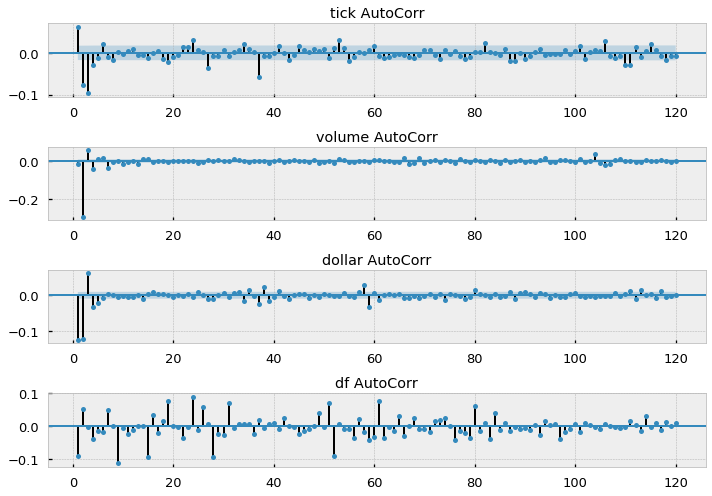

In [93]:
 plot_autocorr(bar_types,bar_returns)

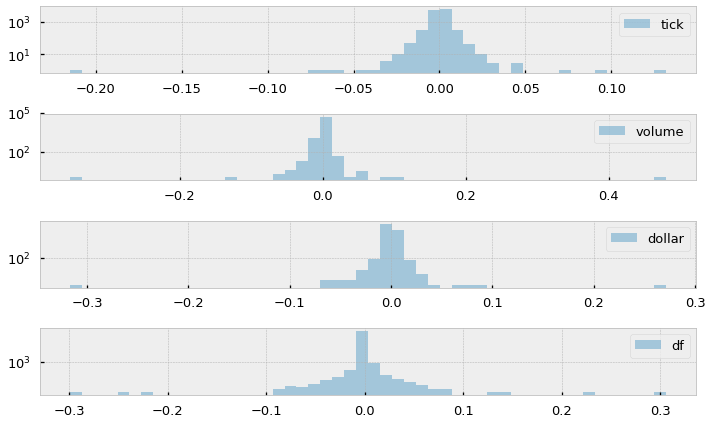

In [94]:
plot_hist(bar_types,bar_returns)

## Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance

In [95]:
def partition_monthly(s):
    return s.resample('1M').var()

In [118]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)
df_ret_rs = partition_monthly(df_ret)
monthly_vars = [tr_rs, vr_rs, dr_rs, df_ret_rs]

In [119]:
get_test_stats(bar_types,monthly_vars,np.var).sort_values('var_stat')

,sample_size,var_stat
df,102.0,5.701116e-12
tick,102.0,2.033541e-09
dollar,102.0,2.258333e-09
volume,102.0,2.918462e-09


## Compute Jarque-Bera Test, Which Has Lowest Test Statistic?

In [98]:
def jb(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.jarque_bera(x)[0]
    return stats.jarque_bera(x)[1]

get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')

,sample_size,jb_stat
tick,12934.0,1.107317e+08
dollar,44811.0,4.022110e+10
volume,54902.0,2.608531e+11
df,1293577.0,1.658044e+14


## Compute Shapiro-Wilk Test

Shapiro-Wilk test statistic > larger is better.

In [99]:
def shapiro(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.shapiro(x)[0]
    return stats.shapiro(x)[1]

(get_test_stats(bar_types,bar_returns,shapiro)
 .sort_values('shapiro_stat')[::-1])

,sample_size,shapiro_stat
tick,12934.0,0.650087
dollar,44811.0,0.401451
volume,54902.0,0.276730
df,1293577.0,0.172775


# Compare Serial Correlation between Dollar and Dollar Imbalance Bars

### Update [05.04.18]

Earlier version was missing some additional code. Before we can compare we must compute the Dollar Imbalance Bar. This is my initial implementation of this concept but is experimental and may need some adjustments. 

   1. Compute the sequence ${bt}_{t=1,...,T}$.
   2. Compute the imbalance at time $T$ defined as $\theta_T = \sum_{t=1}^{T}b_tv_t$.
   3. Compute the expected value of $T$ as ewma of previous $T$ values.
   4. Compute the expected value of $\theta_T$ as ewma of $b_tv_t$ values.
   5. for each index:
        - compute $\lvert\theta_t\rvert >= E_0[T] * \lvert2v^+-E_0[v_t]\rvert$
        - if the condition is met capture the quantity of ticks
        - reset tick count
        - continue


In [100]:
tidx = get_imbalance(df.price.values)*df.dv.iloc[1:]
cprint(tidx)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             dv
dates                          
2018-02-26 15:59:59     80745.0
2018-02-26 16:00:00    618506.7
2018-02-26 16:10:00         0.0
2018-02-26 16:16:14 -89781458.1
2018-02-26 18:30:00         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293577 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 1 columns):
dv    1293577 non-null float64
dtypes: float64(1)
memory usage: 19.7 MB
None
-------------------------------------------------------------------------------



In [101]:
wndo = tidx.shape[0]//1000
print(f'window size: {wndo:,.2f}')

## Expected value of bs approximated by ewm
E_bs = tidx.ewm(wndo).mean() # expected `bs`

## what is E_T??? 
## in this implementation E_T is ewm of index values
E_T = pd.Series(range(tidx.shape[0]), index=tidx.index).ewm(wndo).mean()

df0 =(pd.DataFrame().assign(bs=tidx)
      .assign(E_T=E_T).assign(E_bs=E_bs)
      .assign(absMul=lambda df: df.E_T*np.abs(df.E_bs))
      .assign(absTheta=tidx.cumsum().abs()))
cprint(df0)

window size: 1,293.00
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             bs        E_T          E_bs        absMul  \
dates                                                                    
2018-02-26 15:59:59     80745.0  1292279.0  11492.246200  1.485119e+10   
2018-02-26 16:00:00    618506.7  1292280.0  11961.345468  1.545741e+10   
2018-02-26 16:10:00         0.0  1292281.0  11952.101770  1.544547e+10   
2018-02-26 16:16:14 -89781458.1  1292282.0 -57440.023579  7.422871e+10   
2018-02-26 18:30:00         0.0  1292283.0 -57395.634071  7.417140e+10   

                         absTheta  
dates                              
2018-02-26 15:59:59  5.971441e+08  
2018-02-26 16:00:00  5.965256e+08  
2018-02-26 16:10:00  5.965256e+08  
2018-02-26 16:16:14  6.863070e+08  
2018-02-26 18:30:00  6.863070e+08  
-------------------------

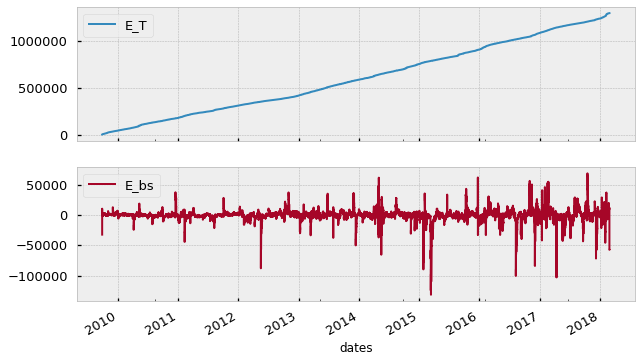

In [102]:
df0[['E_T','E_bs']].plot(subplots=True, figsize=(10,6));

In [103]:
display(df0.describe()/1000)

,bs,E_T,E_bs,absMul,absTheta
count,1293.577000,1293.577000,1293.577000,1.293577e+03,1293.577000
mean,-0.530550,645.497127,-0.469406,4.069884e+06,268920.544491
std,455.872429,373.419987,9.894720,8.029208e+06,258737.672345
min,-122720.979510,0.000000,-131.586742,0.000000e+00,0.353707
25%,-18.534000,322.101000,-2.595953,4.009306e+05,44783.389801
50%,-0.000000,645.495000,-0.022982,1.469284e+06,112420.917375
75%,18.519408,968.889000,2.665594,4.069666e+06,538502.123368
max,103881.575980,1292.283000,68.755154,1.172180e+08,792922.568925


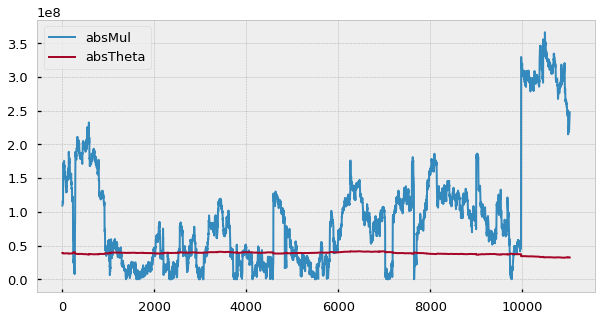

In [122]:
(df0.loc['2010-06',['absMul','absTheta']]
 .reset_index(drop=True)
 .plot(figsize=(10,5)))

In [105]:
def test_t_abs(absTheta,t,E_bs):
    """
    Bool function to test inequality
    *row is assumed to come from df.itertuples()
    -absTheta: float(), row.absTheta
    -t: pd.Timestamp()
    -E_bs: float(), row.E_bs
    """
    return (absTheta >= t*E_bs)

def agg_imbalance_bars(df):
    """
    Implements the accumulation logic
    """
    start = df.index[0]  
    bars = []
    for row in df.itertuples():
        t_abs = row.absTheta
        rowIdx = row.Index
        E_bs = row.E_bs
        
        t = df.loc[start:rowIdx].shape[0]
        if t<1: t=1 # if t lt 1 set equal to 1
        if test_t_abs(t_abs,t,E_bs):
            bars.append((start,rowIdx,t))
            start = rowIdx
    return bars

In [106]:
bars = agg_imbalance_bars(df0)
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts'])
                 .drop_duplicates())
cprint(test_imb_bars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      start                stop  Ts
1293543 2018-02-26 15:59:59 2018-02-26 15:59:59   2
1293544 2018-02-26 15:59:59 2018-02-26 16:00:00   3
1293545 2018-02-26 16:00:00 2018-02-26 16:10:00   2
1293546 2018-02-26 16:10:00 2018-02-26 16:16:14   2
1293547 2018-02-26 16:16:14 2018-02-26 18:30:00   2
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112111 entries, 0 to 1293547
Data columns (total 3 columns):
start    1112111 non-null datetime64[ns]
stop     1112111 non-null datetime64[ns]
Ts       1112111 non-null int64
dtypes: datetime64[ns](2), int64(1)
memory usage: 33.9 MB
None
-------------------------------------------------------------------------------



In [107]:
test_imb_bars.Ts.describe().round()

count    1112111.0
mean           3.0
std            2.0
min            1.0
25%            2.0
50%            2.0
75%            3.0
max          139.0
Name: Ts, dtype: float64

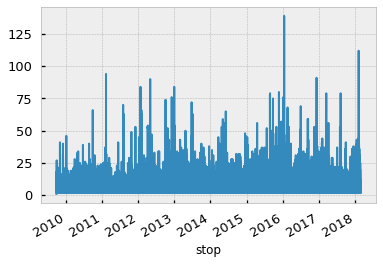

In [108]:
test_imb_bars.set_index('stop')['Ts'].plot()

In [109]:
dvImbBars = df.price.loc[test_imb_bars.stop].drop_duplicates()
cprint(dvImbBars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price
dates                        
2018-02-26 15:51:00  115.2148
2018-02-26 15:51:51  115.2348
2018-02-26 15:52:33  115.2068
2018-02-26 15:53:03  115.1860
2018-02-26 15:56:35  115.2448
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245255 entries, 2009-09-28 09:30:00 to 2018-02-26 15:56:35
Data columns (total 1 columns):
price    245255 non-null float64
dtypes: float64(1)
memory usage: 3.7 MB
None
-------------------------------------------------------------------------------



In [110]:
dvBar = dv_bar_df.price
cprint(dvBar)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price
dates                        
2018-02-26 15:42:24  115.3199
2018-02-26 15:49:42  115.2500
2018-02-26 15:58:15  115.2400
2018-02-26 16:00:00  115.3500
2018-02-26 16:16:14  115.3000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44812 entries, 2009-09-28 09:46:35 to 2018-02-26 16:16:14
Data columns (total 1 columns):
price    44812 non-null float64
dtypes: float64(1)
memory usage: 1.9 MB
None
-------------------------------------------------------------------------------



In [111]:
dr = returns(dv_bar_df.price)
drImb = returns(dvImbBars)

In [112]:
bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

get_test_stats(bar_types,bar_rets,pd.Series.autocorr)

,sample_size,autocorr_stat
dvBar,44811.0,-0.125228
dvImb,245254.0,-0.075617


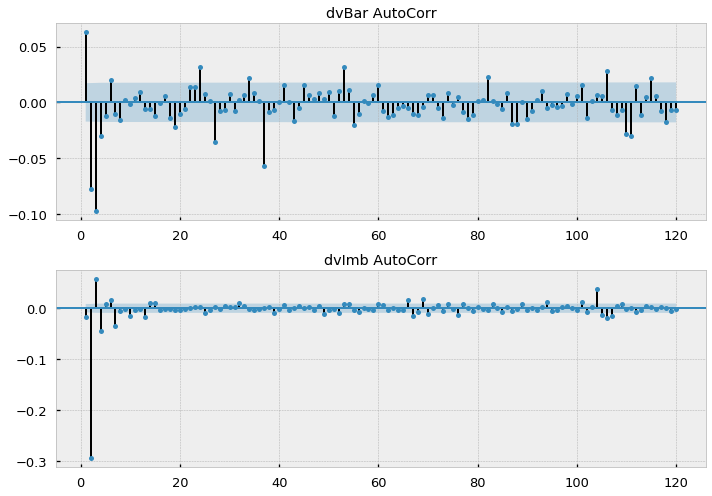

In [113]:
plot_autocorr(bar_types,bar_returns)

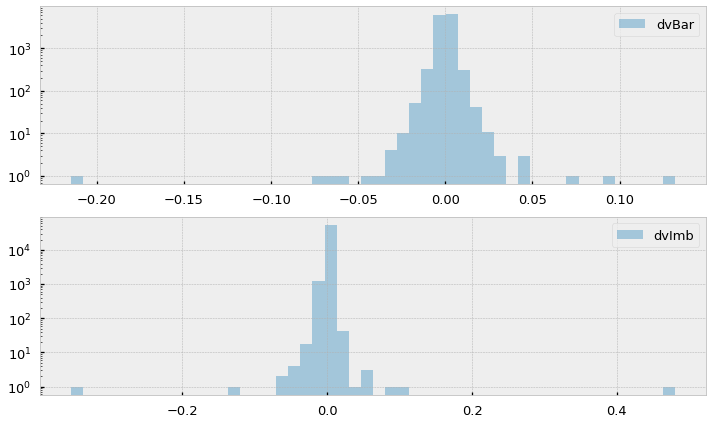

In [114]:
plot_hist(bar_types,bar_returns)

In [115]:
jbs = get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')
shaps = (get_test_stats(bar_types,bar_returns,shapiro)
         .sort_values('shapiro_stat')[::-1])

display(jbs,shaps)

,sample_size,jb_stat
dvBar,12934.0,1.107317e+08
dvImb,54902.0,2.608531e+11


,sample_size,shapiro_stat
dvBar,12934.0,0.650087
dvImb,54902.0,0.276730
